In [1]:
import pandas as pd
import matplotlib.pyplot as plt

PATH = 'C:\\Users\\cpcle\\OneDrive\\Documentos\\Celso\\Veneta\\Dados Winbooks\\Estoques\\'
PATH_N = 'C:\\Users\\cpcle\\OneDrive\\Documentos\\Celso\\Python\\veneta-dash\\data\\'

ISBN = '9788563137333'  # TALCO DE VIDRO

MES = {1: 'Jan', 2: 'Fev', 3: 'Mar', 4: 'Abr',
       5: 'Mai', 6: 'Jun', 7: 'Jul', 8: 'Ago',
       9: 'Set', 10: 'Out', 11: 'Nov', 12: 'Dez'}


ROY = 0.1
IMP = 0.0228

pd.set_option('max_rows', None)


In [2]:
est = pd.read_pickle(PATH + 'estoques_diarios.pkl').reset_index()
est = est[est['ISBN'] == ISBN]
est['Saldo Final'] = est[['Saldo_V', 'Saldo_T', 'Saldo_E']].sum(axis=1)
est['Saldo Inicial'] = est['Saldo Final'].shift(1)
est['Perdas'] = est['Saldo Final'] - est['Tiragem'].fillna(0) -\
                est['Saldo Inicial'] + est['Vendas']
est['Valor Perdas'] = est['Perdas'] * est['Custo Médio']
est['Valor Médio'] = est['Custo Médio'] * est['Saldo Final']
aux = est.groupby(pd.Grouper(key='Data', freq='MS'))\
            .aggregate({'Saldo Final': 'last', 'Saldo Inicial': 'first',
                        'CMV': 'sum', 'Valor Estoques': 'last',
                        'Valor Médio': 'mean', 'Tiragem': 'sum',
                        'Vendas': 'sum', 'Perdas': 'sum',
                        'Valor Perdas': 'sum'})\
            .rename({'Valor Estoques': 'Valor Final'}, axis=1)

minimo = aux.loc[aux['Saldo Final'] != 0].index.min()
sd_m = aux[aux.index >= minimo][['Saldo Inicial', 'Tiragem', 'Vendas', 'Perdas',
                                'Saldo Final', 'CMV', 'Valor Médio', 'Valor Perdas']]

form = {'Saldo Inicial': '{:,.0f}', 'Tiragem': '{:,.0f}', 'Vendas': '{:,.0f}',
        'Perdas': '{:,.0f}', 'Saldo Final': '{:,.0f}', 'CMV': '{:,.2f}', 'Valor Médio': '{:,.2f}', 'Valor Perdas': '{:,.2f}'}

aux = sd_m.copy()
for col in aux.columns:
    aux[col] = aux[col].map(lambda x: form[col].format(x).replace(',', '#').replace('.', ',').replace('#', '.'))

aux.index = aux.index.map(lambda x: MES[x.month] + ' ' + str(x.year))
aux


,Saldo Inicial,Tiragem,Vendas,Perdas,Saldo Final,CMV,Valor Médio,Valor Perdas
Data,,,,,,,,
Mar 2015,0,2.088,415,-2.765,-1.092,"3.328,68","-3.572,67","-22.177,84"
Abr 2015,-1.092,0,282,-57,-1.431,"2.261,90","-10.244,05","-457,19"
Mai 2015,-1.431,0,164,-119,-1.714,"1.315,43","-12.610,96","-954,49"
Jun 2015,-1.714,0,101,-57,-1.872,"810,11","-14.462,79","-457,19"
Jul 2015,-1.872,1.500,260,-1.519,-2.151,"1.838,20","-13.911,02","-10.739,33"
Ago 2015,-2.151,0,156,88,-2.219,"1.102,92","-15.523,90","622,16"
Set 2015,-2.219,0,111,-5,-2.335,"784,77","-15.998,70","-35,35"
Out 2015,-2.335,0,113,-44,-2.492,"798,91","-17.182,38","-311,08"
Nov 2015,-2.492,0,208,10,-2.690,"1.470,56","-18.213,73","70,70"


In [3]:
aux = est.groupby(pd.Grouper(key='Data', freq='YS'))\
    .aggregate({'Saldo Final': 'last', 'Saldo Inicial': 'first',
                'CMV': 'sum', 'Valor Estoques': 'last',
                'Valor Médio': 'mean', 'Tiragem': 'sum',
                'Vendas': 'sum', 'Perdas': 'sum',
                'Valor Perdas': 'sum'})\
    .rename({'Valor Estoques': 'Valor Final'}, axis=1)

minimo = aux.loc[aux['Saldo Final'] != 0].index.min()
sd_a = aux[aux.index >= minimo][['Saldo Inicial', 'Tiragem', 'Vendas', 'Perdas',
                                'Saldo Final', 'CMV', 'Valor Médio', 'Valor Perdas']]

aux = sd_a.copy()
for col in aux.columns:
    aux[col] = aux[col].map(lambda x: form[col].format(
        x).replace(',', '#').replace('.', ',').replace('#', '.'))

aux.index = aux.index.year
aux


,Saldo Inicial,Tiragem,Vendas,Perdas,Saldo Final,CMV,Valor Médio,Valor Perdas
Data,,,,,,,,
2015,0,3.588,2.054,-4.353,-2.819,"15.436,56","-11.851,37","-33.626,57"
2016,-2.819,1.500,1.839,-1.367,-4.525,"15.189,43","-30.531,19","-13.227,89"
2017,-4.525,0,1.080,105,-5.500,"10.465,20","-48.504,16","1.017,45"
2018,-5.500,0,138,113,-5.525,"1.337,22","-53.401,27","1.094,97"
2019,-5.525,2.000,995,4.814,294,"12.228,06","-53.103,10","59.206,98"
2020,294,0,449,843,688,"5.522,70","10.124,21","10.368,90"
2021,688,2.000,453,0,2.235,"5.316,68","11.652,43","8,30"


In [4]:
notas = pd.read_pickle(PATH_N + 'Notas.pkl')
notas = notas[notas['Produto'] == ISBN]

aux = notas.groupby(pd.Grouper(key='Emissao', freq='MS'))[['Receita Bruta', 'Receita Líquida', 'Vendas']].sum()
aux['Desconto'] = 1 - aux['Receita Líquida'] / aux['Receita Bruta']
aux['Royalties'] = ROY * aux['Receita Bruta']
aux['Impostos'] = IMP * aux['Receita Líquida']
aux = aux.merge(sd_m[['CMV', 'Valor Perdas']], how='left', left_index=True, right_index=True)
aux['Margem'] = aux['Receita Líquida'] - aux['Royalties'] - aux['Impostos'] -\
                aux['CMV']
aux['Margem %'] = aux['Margem'] / aux['Receita Líquida']
aux = aux[['Receita Bruta', 'Desconto', 'Receita Líquida', 'Vendas',
           'Royalties', 'Impostos', 'CMV', 'Margem', 'Margem %', 'Valor Perdas']]

form = {'Receita Bruta': '{:,.2f}', 'Desconto': '{:,.2%}',
        'Receita Líquida': '{:,.2f}', 'Vendas': '{:,.0f}',
        'Royalties': '{:,.2f}', 'Impostos': '{:,.2f}', 'CMV': '{:,.2f}',
        'Margem': '{:,.2f}', 'Valor Perdas': '{:,.2f}', 'Margem %': '{:,.2%}'}

for col in aux.columns:
    aux[col] = aux[col].map(lambda x: form[col].format(
        x).replace(',', '#').replace('.', ',').replace('#', '.'))

aux.index = aux.index.map(lambda x: MES[x.month] + ' ' + str(x.year))
aux


,Receita Bruta,Desconto,Receita Líquida,Vendas,Royalties,Impostos,CMV,Margem,Margem %,Valor Perdas
Emissao,,,,,,,,,,
Mar 2015,"24.858,50","47,24%","13.115,11",415,"2.485,85","299,02","3.328,68","7.001,55","53,39%","-22.177,84"
Abr 2015,"16.682,50","49,22%","8.470,64",282,"1.668,25","193,13","2.261,90","4.347,36","51,32%","-457,19"
Mai 2015,"9.813,70","51,10%","4.799,25",164,"981,37","109,42","1.315,43","2.393,03","49,86%","-954,49"
Jun 2015,"6.049,90","52,62%","2.866,18",101,"604,99","65,35","810,11","1.385,73","48,35%","-457,19"
Jul 2015,"15.099,05","45,07%","8.294,40",260,"1.509,90","189,11","1.838,20","4.757,18","57,35%","-10.739,33"
Ago 2015,"9.141,14","49,57%","4.609,78",156,"914,11","105,10","1.102,92","2.487,64","53,96%","622,16"
Set 2015,"6.648,90","52,39%","3.165,72",111,"664,89","72,18","784,77","1.643,88","51,93%","-35,35"
Out 2015,"5.121,60","39,59%","3.093,97",113,"512,16","70,54","798,91","1.712,36","55,34%","-311,08"
Nov 2015,"12.220,00","53,58%","5.672,96",208,"1.222,00","129,34","1.470,56","2.851,06","50,26%","70,70"


In [5]:
aux = notas.groupby(pd.Grouper(key='Emissao', freq='YS'))[
    ['Receita Bruta', 'Receita Líquida', 'Vendas']].sum()
aux['Desconto'] = 1 - aux['Receita Líquida'] / aux['Receita Bruta']
aux['Royalties'] = ROY * aux['Receita Bruta']
aux['Impostos'] = IMP * aux['Receita Líquida']
aux = aux.merge(sd_a[['CMV', 'Valor Perdas']], how='left',
                left_index=True, right_index=True)
aux['Margem'] = aux['Receita Líquida'] - aux['Royalties'] - \
                aux['Impostos'] - aux['CMV']
aux['Margem %'] = aux['Margem'] / aux['Receita Líquida']
aux = aux[['Receita Bruta', 'Desconto', 'Receita Líquida', 'Vendas',
           'Royalties', 'Impostos', 'CMV', 'Margem', 'Margem %', 'Valor Perdas']]

dre_a = aux.copy()

for col in aux.columns:
    aux[col] = aux[col].map(lambda x: form[col].format(
        x).replace(',', '#').replace('.', ',').replace('#', '.'))

aux.index = aux.index.year
aux


,Receita Bruta,Desconto,Receita Líquida,Vendas,Royalties,Impostos,CMV,Margem,Margem %,Valor Perdas
Emissao,,,,,,,,,,
2015,"118.444,79","46,87%","62.929,28",2.054,"11.844,48","1.434,79","15.436,56","34.213,45","54,37%","-33.626,57"
2016,"107.990,17","50,82%","53.111,63",1.839,"10.799,02","1.210,95","15.189,43","25.912,24","48,79%","-13.227,89"
2017,"62.360,53","51,28%","30.381,47",1.080,"6.236,05","692,70","10.465,20","12.987,52","42,75%","1.017,45"
2018,"8.198,55","46,73%","4.367,72",138,"819,86","99,58","1.337,22","2.111,06","48,33%","1.094,97"
2019,"62.758,10","52,04%","30.100,21",995,"6.275,81","686,28","12.228,06","10.910,06","36,25%","59.206,98"
2020,"25.087,97","44,33%","13.967,44",449,"2.508,80","318,46","5.522,70","5.617,49","40,22%","10.368,90"
2021,"27.196,36","47,68%","14.228,50",453,"2.719,64","324,41","5.316,68","5.867,78","41,24%","8,30"


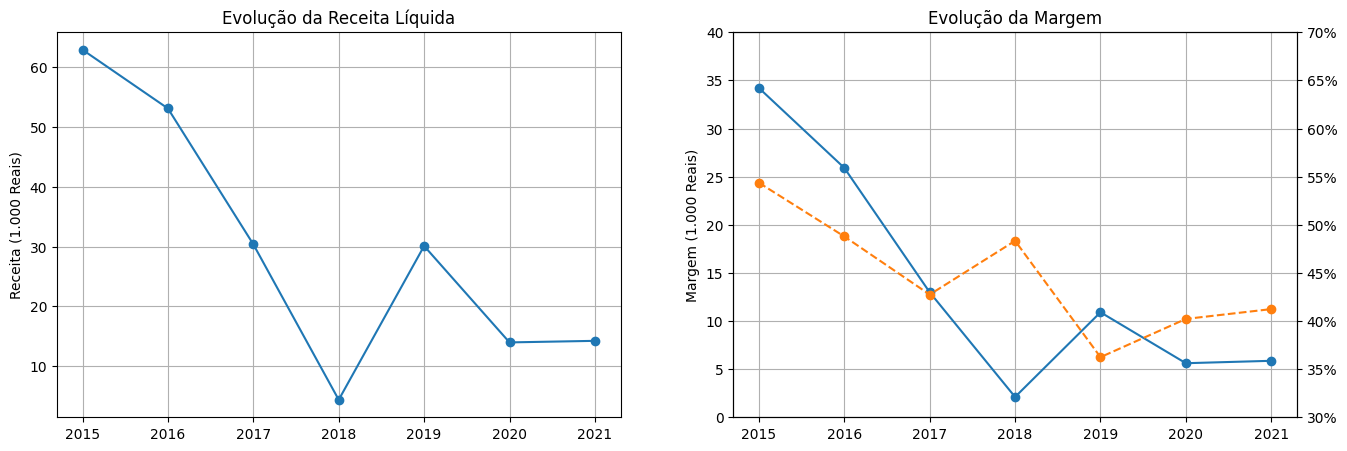

In [6]:
# Cria Gráfico
plt.style.use('default')

fig, axs = plt.subplots(1, 2, figsize=(16, 5))

x = dre_a.index.year
y = dre_a['Receita Líquida'] / 1000
axs[0].plot(x, y, marker='o', linestyle='-')
axs[0].set_title('Evolução da Receita Líquida')
axs[0].set_ylabel('Receita (1.000 Reais)')
axs[0].yaxis.set_major_formatter(lambda x, y: '{:,.0f}'.format(x).replace(',', '#').replace('.', ',').replace('#', '.'))
axs[0].grid()

y = dre_a['Margem'] / 1000
axs[1].plot(x, y, marker='o', linestyle='-')
secax = axs[1].twinx()
secax.set_ylim([0.30, 0.70])
secax.plot(x, dre_a['Margem %'], marker='o', linestyle='--', color='C1')
secax.yaxis.set_major_formatter(lambda x, y: '{:,.0%}'.format(
    x).replace(',', '#').replace('.', ',').replace('#', '.'))
axs[1].set_title('Evolução da Margem')
axs[1].set_ylabel('Margem (1.000 Reais)')
axs[1].yaxis.set_major_formatter(lambda x, y: '{:,.0f}'.format(
    x).replace(',', '#').replace('.', ',').replace('#', '.'))
axs[1].set_ylim([0, 40])
axs[1].grid()

plt.show()


In [7]:
#! jupyter nbconvert --to html  --no-input painel_produto.ipynb --output-dir=C:\\Users\\cpcle\\OneDrive\\Documentos\\Celso\\Python\\veneta-custo\\html